In [36]:
#Nhập thư viện
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
#Nhập dataset
data=pd.read_csv("D:/medical_insurance.csv")

In [38]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [40]:
data.duplicated().sum()
#Xử lý giá trị trùng lặp
data=data.drop_duplicates()

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1337 non-null   int64  
 1   sex        1337 non-null   int64  
 2   bmi        1337 non-null   float64
 3   children   1337 non-null   int64  
 4   smoker     1337 non-null   int64  
 5   charges    1337 non-null   float64
 6   northeast  1337 non-null   bool   
 7   northwest  1337 non-null   bool   
 8   southeast  1337 non-null   bool   
 9   southwest  1337 non-null   bool   
dtypes: bool(4), float64(2), int64(4)
memory usage: 78.3 KB


In [41]:
# Lọc ra các cột dữ liệu số
data_numeric = data.select_dtypes(include=['number'])

# Tính toán ma trận tương quan
corr_matrix = data_numeric.corr()

# Hiển thị ma trận tương quan
print(corr_matrix)

               age       bmi  children   charges
age       1.000000  0.109344  0.041536  0.298308
bmi       0.109344  1.000000  0.012755  0.198401
children  0.041536  0.012755  1.000000  0.067389
charges   0.298308  0.198401  0.067389  1.000000


<Axes: >

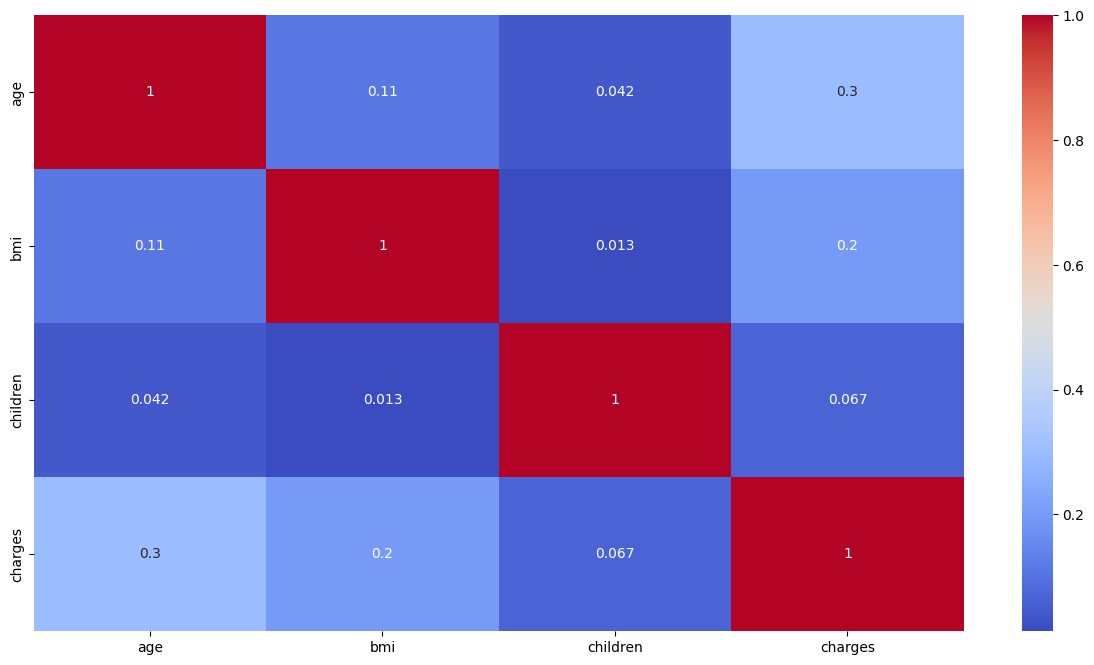

In [42]:
plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

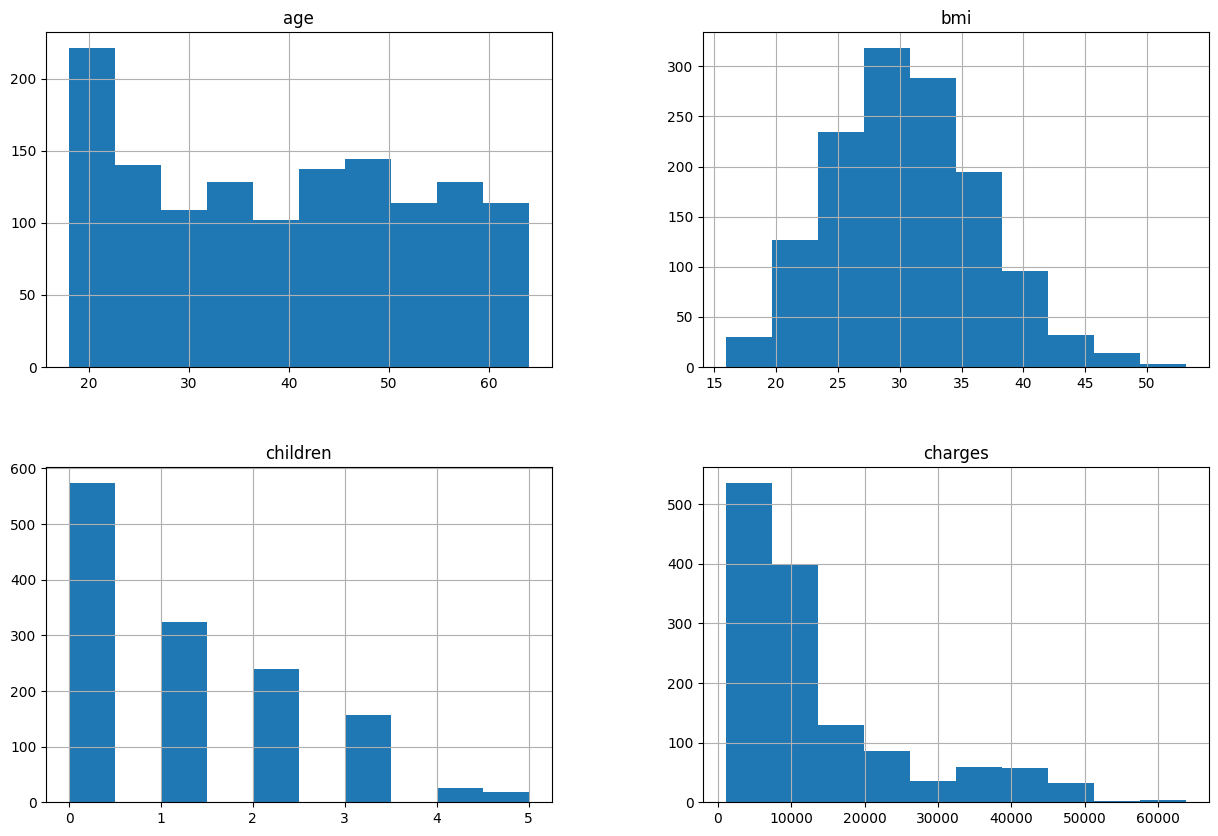

In [43]:
#phân bố dữ liệu
data.hist(figsize=(15,10))

In [44]:
#có thể thấy rằng: dữ liệu bị lệch, đó không phải là một đường cong hình chuông gaussian đẹp
# Chúng ta sẽ lấy logarit của những biến đó và cách phân phối chúng như thế nào
#"Children" (Số con), dữ liệu không nhất thiết phải chuẩn hóa trong một số trường hợp, bởi vì biến này là biến rời rạc (discrete variable) và có số lượng giá trị rất ít, cụ thể là các số nguyên 0, 1, 2, 3, 4, 5.

data['charges']=np.log(data['charges']+1) # +1 để tránh Log(0)

C:\Users\Admin\AppData\Local\Temp\ipykernel_9160\3214202586.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['charges']=np.log(data['charges']+1) # +1 để tránh Log(0)


In [45]:
""" 
Ý nghĩa của việc này:
- Xử lý phân phối lệch (Skewness):

Nếu phân phối của dữ liệu charges bị lệch về phía giá trị lớn (có đuôi dài bên phải), việc lấy logarit giúp biến phân phối trở nên gần hơn với phân phối chuẩn (normal distribution).
Điều này rất quan trọng đối với các mô hình hồi quy và nhiều thuật toán khác, vì chúng hoạt động tốt hơn khi dữ liệu có phân phối gần chuẩn.
- Giảm ảnh hưởng của outliers (ngoại lệ):

Phép logarit làm giảm độ lớn của các giá trị lớn một cách tương đối, giúp giảm tác động của các ngoại lệ lớn (outliers), khiến mô hình không bị chi phối quá mức bởi các giá trị này.
- Tăng tính tuyến tính:

Với các bài toán hồi quy, việc sử dụng logarit đôi khi giúp tạo mối quan hệ tuyến tính hơn giữa biến độc lập (independent variables) và biến phụ thuộc (dependent variable), giúp mô hình học tốt hơn.
Cộng thêm 1:

- Việc cộng thêm 1 nhằm tránh lỗi log của 0 (vì log(0) không xác định). charges + 1 đảm bảo rằng mọi giá trị của charges đều dương, kể cả khi giá trị ban đầu là 0.
"""

' \nÝ nghĩa của việc này:\n- Xử lý phân phối lệch (Skewness):\n\nNếu phân phối của dữ liệu charges bị lệch về phía giá trị lớn (có đuôi dài bên phải), việc lấy logarit giúp biến phân phối trở nên gần hơn với phân phối chuẩn (normal distribution).\nĐiều này rất quan trọng đối với các mô hình hồi quy và nhiều thuật toán khác, vì chúng hoạt động tốt hơn khi dữ liệu có phân phối gần chuẩn.\n- Giảm ảnh hưởng của outliers (ngoại lệ):\n\nPhép logarit làm giảm độ lớn của các giá trị lớn một cách tương đối, giúp giảm tác động của các ngoại lệ lớn (outliers), khiến mô hình không bị chi phối quá mức bởi các giá trị này.\n- Tăng tính tuyến tính:\n\nVới các bài toán hồi quy, việc sử dụng logarit đôi khi giúp tạo mối quan hệ tuyến tính hơn giữa biến độc lập (independent variables) và biến phụ thuộc (dependent variable), giúp mô hình học tốt hơn.\nCộng thêm 1:\n\n- Việc cộng thêm 1 nhằm tránh lỗi log của 0 (vì log(0) không xác định). charges + 1 đảm bảo rằng mọi giá trị của charges đều dương, kể cả k

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

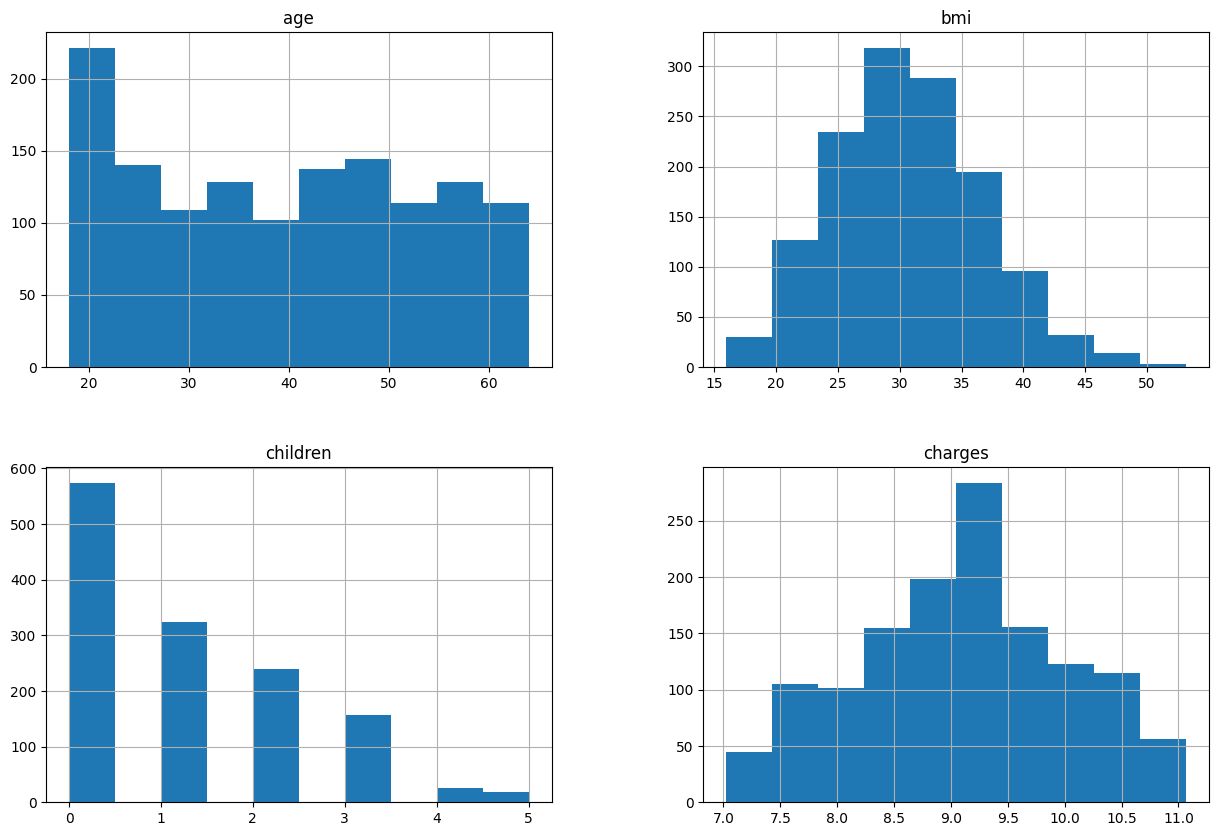

In [46]:
data.hist(figsize=(15,10))

In [47]:
data.region.value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

### Mã hóa

In [48]:
# Sử dụng one-hot encoding cho cột 'region' 
data_encoded = pd.get_dummies(data['region'])

# Nối kết quả vào DataFrame ban đầu
data = data.join(data_encoded)

# Xóa cột ban đầu nếu không cần
data.drop(columns='region', inplace=True)

In [49]:
#Chuyển đổi cột giới tính, smoker
data.sex= data.sex.map({'male':0, 'female':1})
data.smoker= data.smoker.map({'no':0, 'yes':1})

In [50]:
data

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,1,27.900,0,1,9.734236,False,False,False,True
1,18,0,33.770,1,0,7.453882,False,False,True,False
2,28,0,33.000,3,0,8.400763,False,False,True,False
3,33,0,22.705,0,0,9.998137,False,True,False,False
4,32,0,28.880,0,0,8.260455,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,9.268755,False,True,False,False
1334,18,1,31.920,0,0,7.699381,True,False,False,False
1335,18,1,36.850,0,0,7.396847,False,False,True,False
1336,21,1,25.800,0,0,7.605365,False,False,False,True


<Axes: >

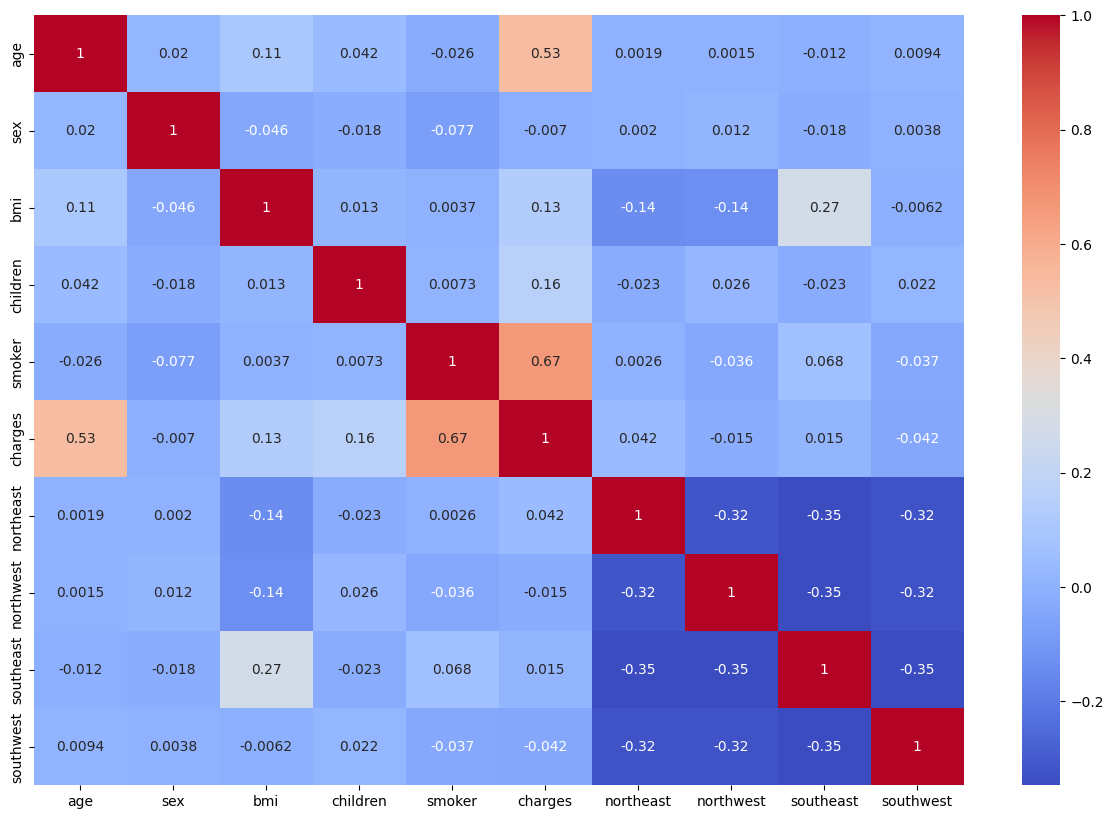

In [51]:
#hearmap
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True, cmap='coolwarm')

## Chia tập dữ liệu

In [52]:
#Nhập thư viện để chia tách dữ liệu
from sklearn.model_selection import train_test_split

X=data.drop(columns='charges')
y=data['charges']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Linear regression

In [54]:
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()
#khớp mô hình với X_train và y_train
lin_reg.fit(X_train, y_train)

lin_reg.score(X_test, y_test)

0.829478626133356

In [55]:
#dự đoán giá trị với X test dataset
y_pred=lin_reg.predict(X_test)

In [56]:
from sklearn.metrics import r2_score
r2_score(y_pred, y_test)

0.7686161365120192

In [57]:
#Chuẩn hóa dữ liệu
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_scaler = scaler.fit_transform(X)
X_train_s, X_test_s, y_train, y_test = train_test_split(X_scaler,y,test_size=0.2,random_state=42)

lin_reg_s=LinearRegression()
#khớp mô hình với X_train và y_train
lin_reg_s.fit(X_train_s, y_train)

lin_reg_s.score(X_test_s, y_test)

0.8295041666436466

In [58]:
#dự đoán giá trị với X test dataset
y_pred_s=lin_reg_s.predict(X_test_s)

In [59]:
r2_score(y_pred_s, y_test)

0.7686868982100941

In [60]:
#age sex bmi children smoker region_1 region_2 region_3 region_4
input_data= (46,0,33.44,1,0,0,0,1,0)
input_data_array=np.asarray(input_data)
input_data_array=input_data_array.reshape(1,-1)
#mô hình được huấn luyện với dữ liệu lớn (nhiều hàng), nhưng giá trị dự đoán ở đây chỉ có 1 hàng, vì vậy cần định hình lại

In [61]:
insurance_premium=lin_reg_s.predict(input_data_array)

In [62]:
print(insurance_premium)

[2.0984955e+11]


In [63]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Giả sử bạn đã có scaler và mô hình hồi quy tuyến tính đã huấn luyện sẵn
# scaler = StandardScaler() -> scaler đã được huấn luyện với dữ liệu huấn luyện
# lin_reg_s = mô hình hồi quy tuyến tính đã huấn luyện

# Dữ liệu đầu vào (age, sex, bmi, children, smoker, region_1, region_2, region_3, region_4)
input_data = (46, 0, 33.44, 1, 0, 0, 0, 1, 0)

# Chuyển dữ liệu đầu vào thành numpy array
input_data_array = np.asarray(input_data)

# Định hình lại dữ liệu (vì mô hình yêu cầu dữ liệu 2D cho dự đoán)
input_data_array = input_data_array.reshape(1, -1)

# Áp dụng StandardScaler để chuẩn hóa dữ liệu (nếu bạn đã chuẩn hóa dữ liệu trong quá trình huấn luyện)
input_data_scaled = scaler.transform(input_data_array)

# Dự đoán chi phí y tế
insurance_premium_log = lin_reg.predict(input_data_scaled)

# Đảo ngược biến đổi logarit để đưa kết quả về giá trị ban đầu
insurance_premium = np.exp(insurance_premium_log) - 1

print(f"Dự đoán chi phí y tế: {insurance_premium[0]:.2f}")


Dự đoán chi phí y tế: 376.26


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Random forest

In [74]:
from sklearn.ensemble import RandomForestRegressor

forest= RandomForestRegressor()

forest.fit(X_train, y_train)

forest.score(X_test,y_test)

0.8521937088130663

In [73]:
#Dữ liệu chuẩn hóa
forest_s= RandomForestRegressor()
forest_s.fit(X_train_s,y_train)
forest_s.score(X_test_s,y_test)

0.8555000505238955

In [66]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Giả sử bạn đã có scaler và mô hình hồi quy tuyến tính đã huấn luyện sẵn
# scaler = StandardScaler() -> scaler đã được huấn luyện với dữ liệu huấn luyện
# lin_reg_s = mô hình hồi quy tuyến tính đã huấn luyện

# Dữ liệu đầu vào (age, sex, bmi, children, smoker, region_1, region_2, region_3, region_4)
input_data = (46, 0, 33.44, 1, 0, 0, 0, 1, 0)

# Chuyển dữ liệu đầu vào thành numpy array
input_data_array = np.asarray(input_data)

# Định hình lại dữ liệu (vì mô hình yêu cầu dữ liệu 2D cho dự đoán)
input_data_array = input_data_array.reshape(1, -1)

# Áp dụng StandardScaler để chuẩn hóa dữ liệu (nếu bạn đã chuẩn hóa dữ liệu trong quá trình huấn luyện)
input_data_scaled = scaler.transform(input_data_array)

# Dự đoán chi phí y tế
insurance_premium_log = forest.predict(input_data_scaled)

# Đảo ngược biến đổi logarit để đưa kết quả về giá trị ban đầu
insurance_premium = np.exp(insurance_premium_log) - 1

print(f"Dự đoán chi phí y tế: {insurance_premium[0]:.2f}")


Dự đoán chi phí y tế: 8250.58


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [75]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Giả sử bạn đã có scaler và mô hình hồi quy tuyến tính đã huấn luyện sẵn
# scaler = StandardScaler() -> scaler đã được huấn luyện với dữ liệu huấn luyện
# lin_reg_s = mô hình hồi quy tuyến tính đã huấn luyện

# Dữ liệu đầu vào (age, sex, bmi, children, smoker, region_1, region_2, region_3, region_4)
input_data = (46, 0, 33.44, 1, 0, 0, 0, 1, 0)

# Chuyển dữ liệu đầu vào thành numpy array
input_data_array = np.asarray(input_data)

# Định hình lại dữ liệu (vì mô hình yêu cầu dữ liệu 2D cho dự đoán)
input_data_array = input_data_array.reshape(1, -1)

# Áp dụng StandardScaler để chuẩn hóa dữ liệu (nếu bạn đã chuẩn hóa dữ liệu trong quá trình huấn luyện)
#input_data_scaled = scaler.transform(input_data_array)

# Dự đoán chi phí y tế
insurance_premium_log = forest_s.predict(input_data_scaled)

# Đảo ngược biến đổi logarit để đưa kết quả về giá trị ban đầu
insurance_premium = np.exp(insurance_premium_log) - 1

print(f"Dự đoán chi phí y tế: {insurance_premium[0]:.2f}")


Dự đoán chi phí y tế: 8232.17


In [76]:
import pickle as pkl

In [80]:
pkl.dump(forest_s, open('MIPML.pkl','wb'))